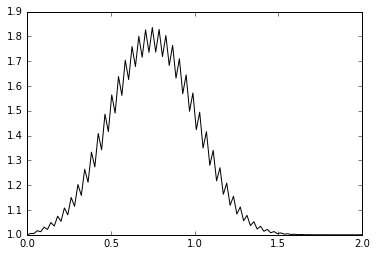

In [13]:
#u = 1 for x <= 1.5
#u = 0 for x > 1.5
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def stair(x):
    u = []
    for i in x:
        if i <= 1.5:
            u.append(1)
        else:
            u.append(0)
    return u

def pulse(x):
    u = []
    for i in x:
        if i < 1 and i > 0.5:
            u.append(2)
        else:
            u.append(1)
    return u

def gaussian(x):
    u = []
    mu = 1.0
    sig2 = 0.1
    for i in x:
        u.append(1.0/(np.sqrt(2.*np.pi*sig2))*np.exp(-np.power(i - mu, 2.)/(2.0*sig2)))
    return u

def lax(x,v,D,dt,Nt):
    dx = x[1]-x[0]
    u_0 = pulse(x)
    for t in np.linspace(0,Nt*dt,Nt):
        u = [u_0[0]]
        for i in range(1,len(u_0)-1):
            u.append(0.5*(u_0[i+1]+u_0[i-1])-0.5*v*dt/dx*(u_0[i+1]-u_0[i-1])+D*dt/(dx**2)*(u_0[i+1]+u_0[i-1]-2*u_0[i]))
        u.append(u_0[-1])
        u_0 = u
    return x,u

x, u = lax(np.linspace(0,2,100),0.2,0.01,0.0001,100)
plt.plot(x,u,'k')

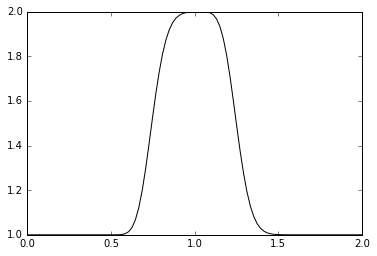

In [7]:
#u = 1 for x <= 1.5
#u = 0 for x > 1.5
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def stair(x):
    u = []
    for i in x:
        if i <= 1.5:
            u.append(1.)
        else:
            u.append(0.)
    return u

def pulse(x):
    u = []
    for i in x:
        if i < 1. and i > 0.5:
            u.append(2.0)
        else:
            u.append(1.0)
    return u

def lax_advection(x, v, dt, Nt):
    dx = 0.02
    u0 = np.copy(pulse(x))
    for t in np.linspace(0,Nt*dt,Nt):
        u0[1:] = u0[1:] - v*dt/dx*(u0[1:]-u0[:-1])
    return x, u0

x, u = lax_advection(np.linspace(0,2,100),0.05,0.01,500)
plt.plot(x,u,'k')